In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv("credit_train.csv")

In [3]:
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(100514, 19)

In [5]:
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
data[data.isna().any(axis=1)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
miss=((data.isnull().sum()/len(data))*100).sort_values(ascending=False)
print(miss)

Months since last delinquent    53.380624
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Bankruptcies                     0.714328
Tax Liens                        0.521320
Maximum Open Credit              0.513361
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Purpose                          0.511372
Home Ownership                   0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Loan ID                          0.511372
dtype: float64


In [9]:
data[data.isna().any(axis=1)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.dropna(subset=['Loan Status'],inplace=True)

In [11]:
le=preprocessing.LabelEncoder()
data['Loan Status']=le.fit_transform(data['Loan Status'])

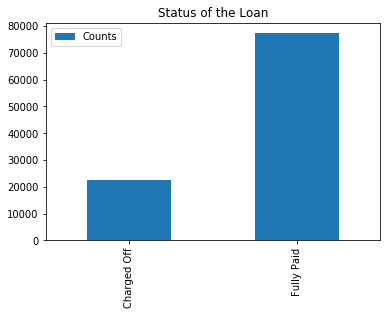

In [12]:
coffvalue=data[data['Loan Status']==0]['Loan Status'].count()
fpaidvalue=data[data['Loan Status']==1]['Loan Status'].count()
data1={"Counts":[coffvalue,fpaidvalue] }
statusDF=pd.DataFrame(data1, index=["Charged Off", "Fully Paid"])
statusDF.plot(kind='bar', title="Status of the Loan")

In [13]:
data['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)

In [14]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [15]:
scount=data[data['Term']== 0]['Term'].count()
lcount=data[data['Term']==1]['Term'].count()
data1={"Counts":[scount,lcount]}
termDF=pd.DataFrame(data1,index=["Short Term", "Long Term"])
termDF.head()

,Counts
Short Term,72208
Long Term,27792


In [16]:
data['Credit Score'].describe()

count    80846.000000
mean      1076.456089
std       1475.403791
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [17]:
data['Credit Score']=data['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [18]:
data['Credit Score'].describe()

count    80846.000000
mean       716.293447
std         28.297164
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

In [19]:
sscoredf=data[data['Term']==0]
stermAVG=sscoredf['Credit Score'].mean()
lscoredf=data[data['Term']==1]
ltermAVG=lscoredf['Credit Score'].mean()
data.loc[(data.Term ==0) & (data['Credit Score'].isnull()),'Credit Score'] = stermAVG
data.loc[(data.Term ==1) & (data['Credit Score'].isnull()),'Credit Score'] = ltermAVG

In [20]:
data['Credit Score']=data['Credit Score'].apply(lambda val: "Average" if np.isreal(val)
                                                  and (val >= 580 and val < 670) else val)
data['Credit Score']=data['Credit Score'].apply(lambda val: "Good" if np.isreal(val) 
                                                  and (val >= 670 and val < 740) else val)
data['Credit Score']=data['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) 
                                                  and (val >= 740 and val < 800) else val)

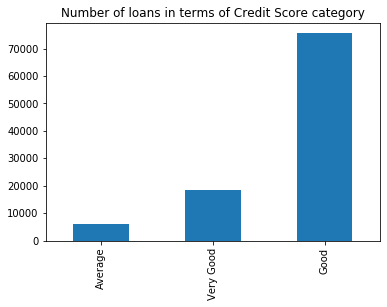

In [21]:
data['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

In [22]:
print(c(data['Credit Score']))

Counter({'Good': 75506, 'Very Good': 18479, 'Average': 6015})


In [23]:
data['Credit Score']=le.fit_transform(data['Credit Score'])  #applying label encoder
c(data['Credit Score'])

Counter({1: 75506, 2: 18479, 0: 6015})

In [24]:
data['Annual Income'].describe()

count    8.084600e+04
mean     1.378277e+06
std      1.081360e+06
min      7.662700e+04
25%      8.488440e+05
50%      1.174162e+06
75%      1.650663e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [25]:
data['Annual Income'].isnull().sum()

19154

In [26]:
data['Annual Income'].fillna(data['Annual Income'].mean(), inplace=True)

In [27]:
data['Annual Income'].isnull().sum()

0

In [28]:
data['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

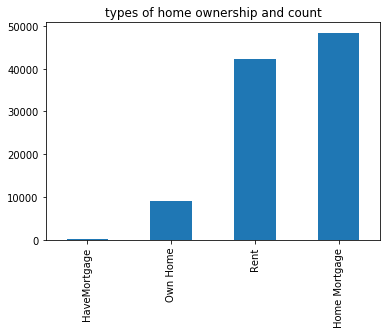

In [29]:
data['Home Ownership'].value_counts().sort_values(ascending=True).plot(kind='bar',title='types of home ownership and count')

In [30]:
print(c(data['Home Ownership']))
data['Home Ownership']=le.fit_transform(data['Home Ownership'])
print(c(data['Home Ownership']))

Counter({'Home Mortgage': 48410, 'Rent': 42194, 'Own Home': 9182, 'HaveMortgage': 214})
Counter({1: 48410, 3: 42194, 2: 9182, 0: 214})


In [31]:
data['Years in current job'].isnull().sum()

4222

In [32]:
data['Years in current job']

0          8 years
1        10+ years
2          8 years
3          3 years
4          5 years
           ...    
99995      7 years
99996       1 year
99997      6 years
99998      9 years
99999          NaN
Name: Years in current job, Length: 100000, dtype: object

In [33]:
data['Years in current job']=data['Years in current job'].str.extract(r"(\d+)")
data['Years in current job']=data['Years in current job'].astype(float)

In [34]:
data['Years in current job']

0         8.0
1        10.0
2         8.0
3         3.0
4         5.0
         ... 
99995     7.0
99996     1.0
99997     6.0
99998     9.0
99999     NaN
Name: Years in current job, Length: 100000, dtype: float64

In [35]:
data['Years in current job'].fillna(data['Years in current job'].mean(),inplace=True)

In [36]:
data['Years in current job'].isnull().sum()

0

In [37]:
data['Number of Credit Problems'].describe()

count    100000.000000
mean          0.168310
std           0.482705
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: Number of Credit Problems, dtype: float64

In [38]:
data['Credit Problems']=data['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 
                        else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))

In [39]:
print(c(data['Credit Problems']))
data['Credit Problems']=le.fit_transform(data['Credit Problems'])
print(c(data['Credit Problems']))

Counter({'No Credit Problem': 86035, 'Some Credit promblem': 13879, 'Major Credit Problems': 86})
Counter({1: 86035, 2: 13879, 0: 86})


In [40]:
data['Credit Age']=data['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 
                                else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [41]:
print(c(data['Credit Age']))
data['Credit Age']=le.fit_transform(data['Credit Age'])
print(c(data['Credit Age']))

Counter({'Exceptional Credit Age': 49958, 'Good Credit Age': 49848, 'Short Credit Age': 194})
Counter({0: 49958, 1: 49848, 2: 194})


In [42]:
data['Tax Liens']=data['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0
                                else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [43]:
print(c(data['Tax Liens']))
data['Tax Liens'] = le.fit_transform(data['Tax Liens'])
print(c(data['Tax Liens']))

Counter({'No Tax Lien': 98062, 'Some Tax Liens': 1717, 'Many Tax Liens': 221})
Counter({1: 98062, 2: 1717, 0: 221})


In [44]:
data['Bankruptcies']=data['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 
                            else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [45]:
print(c(data['Bankruptcies']))
data['Bankruptcies'] = le.fit_transform(data['Bankruptcies'])
print(c(data['Bankruptcies']))

Counter({'No bankruptcies': 88774, 'Some Bankruptcies': 10892, 'Many Bankruptcies': 334})
Counter({1: 88774, 2: 10892, 0: 334})


In [46]:
data['Annual Income'].describe()

count    1.000000e+05
mean     1.378277e+06
std      9.722974e+05
min      7.662700e+04
25%      9.311805e+05
50%      1.369919e+06
75%      1.512704e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [47]:
meanxoutlier=data[data['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
meanxoutlier

1376634.7522600775

In [48]:
stddevxoutlier=data[data['Annual Income'] < 99999999.00 ]['Annual Income'].std()
stddevxoutlier

822080.177474152

In [49]:
poorline=meanxoutlier-stddevxoutlier
richline=meanxoutlier+stddevxoutlier

In [50]:
data['Annual Income'] = data['Annual Income'].apply(lambda x: "Low Income" if x<=poorline else ("Average Income" if x>poorline and x<richline else "High Income"))

In [51]:
print(c(data['Annual Income']))
data['Annual Income']=le.fit_transform(data['Annual Income'])
print(c(data['Annual Income']))

Counter({'Average Income': 86004, 'High Income': 9145, 'Low Income': 4851})
Counter({0: 86004, 1: 9145, 2: 4851})


In [52]:
lameanxoutlier=data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lastddevxoutlier=data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()

In [53]:
lameanxoutlier

312313.59788060916

In [54]:
lastddevxoutlier

186262.16768976193

In [55]:
lowrange=lameanxoutlier-lastddevxoutlier
highrange=lameanxoutlier+lastddevxoutlier

In [56]:
lowrange

126051.43019084723

In [57]:
highrange

498575.76557037106

In [58]:
data['Current Loan Amount'] = data['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [59]:
print(c(data['Current Loan Amount']))
data['Current Loan Amount'] = le.fit_transform(data['Current Loan Amount'])
print(c(data['Current Loan Amount']))

Counter({'Medium Loan': 60112, 'Big Loan': 26506, 'Small Loan': 13382})
Counter({1: 60112, 0: 26506, 2: 13382})


In [60]:
data=data.drop(['Months since last delinquent','Number of Open Accounts',
                  'Maximum Open Credit','Current Credit Balance','Monthly Debt','Loan ID','Customer ID','Purpose'],axis=1)

In [61]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Bankruptcies,Tax Liens,Credit Problems,Credit Age
0,1,1,0,1,0,8.0,1,17.2,1.0,2,1,2,0
1,1,1,0,1,0,10.0,1,21.1,0.0,1,1,1,0
2,1,0,0,2,1,8.0,2,14.9,1.0,1,1,2,1
3,1,1,1,1,0,3.0,2,12.0,0.0,1,1,1,1
4,1,1,0,1,0,5.0,3,6.1,0.0,1,1,1,1


In [62]:
data.shape

(100000, 13)

In [63]:
x=data.drop(['Loan Status'],axis=1)

In [64]:
x

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Bankruptcies,Tax Liens,Credit Problems,Credit Age
0,1,0,1,0,8.000000,1,17.2,1.0,2,1,2,0
1,1,0,1,0,10.000000,1,21.1,0.0,1,1,1,0
2,0,0,2,1,8.000000,2,14.9,1.0,1,1,2,1
3,1,1,1,0,3.000000,2,12.0,0.0,1,1,1,1
4,1,0,1,0,5.000000,3,6.1,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,1,2,7.000000,2,22.3,0.0,1,1,1,0
99996,0,0,1,0,1.000000,3,9.4,0.0,1,1,1,1
99997,2,0,2,0,6.000000,3,18.8,1.0,2,1,2,0
99998,0,0,2,0,9.000000,3,15.0,0.0,1,1,1,1


In [65]:
y=data['Loan Status']

In [66]:
y

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Loan Status, Length: 100000, dtype: int32

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
ypred=dt.predict(x_test)
c(ypred)

Counter({1: 16048, 0: 3952})

In [70]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ypred,y_test)

In [71]:
accuracy

0.70335

In [72]:
c(y_test)

Counter({1: 15521, 0: 4479})

In [73]:
x_test.head(30)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Bankruptcies,Tax Liens,Credit Problems,Credit Age
3582,1,0,1,0,5.000000,1,11.0,0.0,1,1,1,1
60498,0,0,1,0,1.000000,1,12.0,0.0,1,1,1,1
53227,1,0,1,0,7.000000,3,22.0,0.0,1,1,1,0
21333,0,0,2,0,7.000000,3,16.0,0.0,1,1,1,1
3885,1,0,1,0,7.000000,3,17.5,0.0,1,1,1,0
51521,1,0,1,0,10.000000,3,14.1,0.0,1,1,1,1
84261,1,1,1,0,1.000000,3,15.9,0.0,1,1,1,1
10685,1,0,2,0,2.000000,2,9.9,0.0,1,1,1,1
59948,1,0,1,0,4.000000,1,27.4,1.0,2,1,2,0
41032,0,0,2,0,6.000000,3,11.2,0.0,1,1,1,1


In [74]:
y_test[:30]

3582     1
60498    1
53227    1
21333    1
3885     1
51521    1
84261    1
10685    1
59948    1
41032    1
25747    1
44303    0
83813    1
61991    0
49392    0
37116    1
65942    1
2216     1
81749    1
77996    1
30999    1
18294    0
81976    1
29876    1
85471    0
8959     1
70029    0
28324    1
50521    1
89741    1
Name: Loan Status, dtype: int32

In [75]:
ypred[:30]

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1])

In [76]:
import pickle
pickle.dump(dt,open('loanstatus.pkl','wb')) 